# Data Fitting with error

### Suppose we have a set of N data points {$x_{i}$ , $y_{i}$} and a set of estimated uncertainities for the y values{$\delta y_{i}$}. We wish to fit the data in function given below.
$$y_{x} = ax + b $$
### where a and b are the parameters which are adjustable and give best fit. But we need to fit the uncertainities and compute $x^2$ value to determine the quality of the fit.
### A table of data is given below;
|   x   |   y   | $\delta y$ |
| ----- | ----- | ---------- |
| 8.213 | 3.261 | 9.71       |
| 7.402 | 2.52  | 5.59       |
| 6.876 | 2.239 | 7.08       |
| 5.491 | 1.299 | 6.83       |
| 5.196 | 1.175 | 8.93       |

### Here it is similar to the code for a fit without uncertainties, but this time we read the data store in directory named as Data which contain uncertainties .

In [3]:
# module to make available data structures and routines
# for numerics
import numpy as np 

# modules necessary for plotting
import matplotlib.pyplot as plt

#module to make best-fit parameters using a least square fit 
from scipy.optimize import curve_fit

### We need to define the linear function in order to be fit. Here we have to parameters;intercept and slope. Remaining x and y are the recorded value for eqn.

In [4]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y


### We have read the data from the directory Data named as FakeData_with_error_txt file. Here the data contain three column i.e x , y and uncertainties column. Here we used np.loadtext to import text files into Numpy arrays and after using np.loadtext we have to use unpack which consists of assigning an iterable of values to a tuple (or list) of variables in a single assignment statement. Note; here d_y is a data of uncertainities.

In [5]:
xdata,ydata,d_y = np.loadtxt('../Data/FakeData_with_error.txt',unpack=True)


### Here we are converting list into array of all data.

In [6]:
xdata = np.array(xdata)
ydata = np.array(ydata)
d_y = np.array(d_y)

### Here we are guessing the initial value of our parameters

In [7]:
intercept = 20.
slope = 20.

### Here we stored our guess values. note: guess values are parameters not the input data. Generally python take 1 as guess value but it can not fit all function. Generally it works. But adding guess is better in case of best fit

In [8]:
Guess = [intercept,slope]

### we are passing the uncertainities to curve _fit by adding argument sigma= d_y ,po is used as argument for Guess and absolute is used to return the value of argument regardless whether it is positive or negative.eg -3 is if we use absolute it gives 3 which is regardless of sign. parameters-linearFunc means the parameters stored.

In [9]:
parameter_linearFunc,covariance_linearFunc = curve_fit(linearFunc, xdata, ydata, p0=Guess, sigma=d_y, absolute_sigma=True)

### we are getting the fitted value from curve_fit above.

In [10]:
fitted_data_linearFunc = linearFunc(xdata, *parameter_linearFunc)

###  Uncertainity or error is a measure of how strongly the parameters depend on the data. 

In [11]:
Uncertainity = np.sqrt(np.diag(covariance_linearFunc))

### here we are applying the uncertainitiy to the parameters.

In [12]:
intercept_Uncertainity = Uncertainity[0]
slope_Uncertainity = Uncertainity[1]

### plt.error bar is used to plot the data. yerr denotes the error in y that is d_y , fmt = 'r.' means red colours with dot. Label for data is data
### plt.error is for fit . Here color is blue and label is fit
### Note; here we have a symme

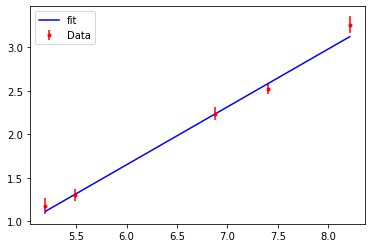

In [13]:
#plt.plot(xdata, ydata, 'o', label = 'Data')
plt.errorbar(xdata,ydata,yerr=d_y,fmt='r.',label='Data')
plt.plot(xdata,fitted_data_linearFunc,color='b',label='fit')
plt.legend() 
plt.show()

### we are printing the value of parameter stored in parameter_linearFuncc and same is done for down cell so.

In [14]:
print("intercept_linearFunc =", parameter_linearFunc[0])

intercept_linearFunc = -2.3430681629006


In [15]:
print("slope_linearFunc =", parameter_linearFunc[1])

slope_linearFunc = 0.6656028689365088


### printing the value of uncertainity of intercept and slope.

In [16]:
print(intercept_Uncertainity)

0.21311098560911845


In [17]:
print(slope_Uncertainity)

0.03157719494370256
